In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

WIDTH = 20
HEIGHT = 10

ops = 0
def add_op():
    global ops
    ops += 1
def reset_ops():
    global ops
    ops = 0

class Grid:
    def __init__(self, w, h):
        self.boxes = [Box(w/2, h/2), Box(w/2, h/2), Box(w/2, h/2), Box(w/2, h/2)]
        self.w = w
        self.h = h
        
    def pos_of(where):
        return int(where[0] >= 0) | (int(where[1] >= 0) << 1) # -1,-1:0 1,-1:1 -1,1:2 1,1:3
    
    def center_of(self, pos):
        signs = np.array([-2*int(pos & 1 == 0)+1, -2*int(pos & 2 == 0)+1])
        return signs * np.array([self.w / 4, self.h / 4])
    
    def recenter(self, where, pos):
        return where - self.center_of(pos)
    
    def nearest_item(self, where, abs_pos=None):
        if abs_pos is None:
            abs_pos = where

        pos = Grid.pos_of(where)
        print([pos] + [n for n in range(4) if n != pos])
        for pos in [pos] + [n for n in range(4) if n != pos]:
            add_op()
            print("Looking in {}".format(pos))
            found = self.boxes[pos].nearest_item(self.recenter(where, pos), abs_pos)
            if found is not None:
                return found
    
    def add_item(self, item, where):
        pos = Grid.pos_of(where)
        self.boxes[pos].add_item(item, self.recenter(where, pos))
        
    def __repr__(self):
        return str(self.boxes)

class Box:
    def __init__(self, w, h):
        self.item = None
        self.item_pos = None
        self.sub = None
        self.w = w
        self.h = h

    def nearest_item(self, where, abs_pos):
        if self.sub:
            return self.sub.nearest_item(where, abs_pos)
        elif self.item is not None:
            return self.item
        
    def add_item(self, item, where):
        assert self.item is None or self.sub is None

        if self.item is None and self.sub is None:
            self.item = item
            self.item_pos = where
            return

        assert not np.array_equal(self.item_pos, where), "Can't have two items occupying the same location!"

        if self.item is not None and self.sub is None:
            self.sub = Grid(self.w, self.h)
            curr_item, curr_where = self.item, self.item_pos
            self.item = None
            self.item_pos = None
            self.add_item(curr_item, curr_where)
        if self.item is None and self.sub is not None:
            self.sub.add_item(item, where)

            
    def __repr__(self):
        if self.item is not None:
            return "[{}]".format(self.item)
        elif self.sub is not None:
            return str(self.sub)
        else:
            return "[]"
        
grid = Grid(WIDTH, HEIGHT)
grid

[[], [], [], []]

In [61]:
items = []
for i in range(10):
    item = i
    pos = np.random.uniform(-0.5, 0.5, size=2) * np.array([WIDTH, HEIGHT])
    items.append((item, pos))
    grid.add_item(item, pos)
items

[(0, array([ 0.89019565,  0.10102774])),
 (1, array([-4.91191609, -3.47452047])),
 (2, array([-8.5427896 ,  2.00631985])),
 (3, array([ 5.59236641,  3.41745389])),
 (4, array([ 5.18419698,  2.69155059])),
 (5, array([ 0.63643008,  1.84274065])),
 (6, array([ 8.27954096, -2.46561418])),
 (7, array([ 9.47307705,  1.57777507])),
 (8, array([-2.73764275, -3.50055926])),
 (9, array([ 9.21567699, -2.49247804]))]

In [62]:
ref = np.array([1, 1])

reset_ops()
nearest_item = grid.nearest_item(ref)
nearest_item_pos = [i for i in items if i[0] == nearest_item]
print(nearest_item, nearest_item_pos)

lin_nearest_item = min(items, key=lambda p: np.linalg.norm(p[1] - ref))
print(lin_nearest_item)

print(ops, "ops")
nearest_item == lin_nearest_item[0]

[3, 0, 1, 2]
Looking in 3
[0, 1, 2, 3]
Looking in 0
[0, 1, 2, 3]
Looking in 0
0 [(0, array([ 0.89019565,  0.10102774]))]
(0, array([ 0.89019565,  0.10102774]))
3 ops


True

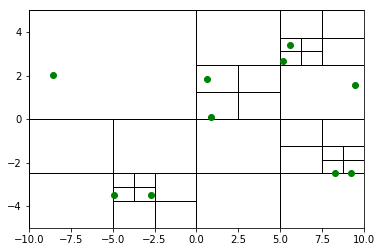

In [63]:
fig2 = plt.figure()
plt.xlim((-WIDTH/2, WIDTH/2))
plt.ylim((-HEIGHT/2, HEIGHT/2))
ax2 = fig2.add_subplot(111)

def add_box(ax2, box, center):
    ax2.add_patch( patches.Rectangle( center - np.array([box.w/2, box.h/2]), box.w, box.h, fill=False ) )
    if box.sub is not None:
        add_gridrect(ax2, box.sub, center)
    elif box.item_pos is not None:
        plt.plot(*(center + box.item_pos), 'go')

def add_gridrect(ax2, grid, center):
    add_box(ax2, grid.boxes[0], center + np.array([-grid.w/4, -grid.h/4]))
    add_box(ax2, grid.boxes[1], center + np.array([grid.w/4, -grid.h/4]))
    add_box(ax2, grid.boxes[2], center + np.array([-grid.w/4, grid.h/4]))
    add_box(ax2, grid.boxes[3], center + np.array([grid.w/4, grid.h/4]))
    
add_gridrect(ax2, grid, np.array([0, 0]))
plt.show()